In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["figure.dpi"] = 300

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]

In [6]:
single_image.shape

(28, 28)

In [7]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

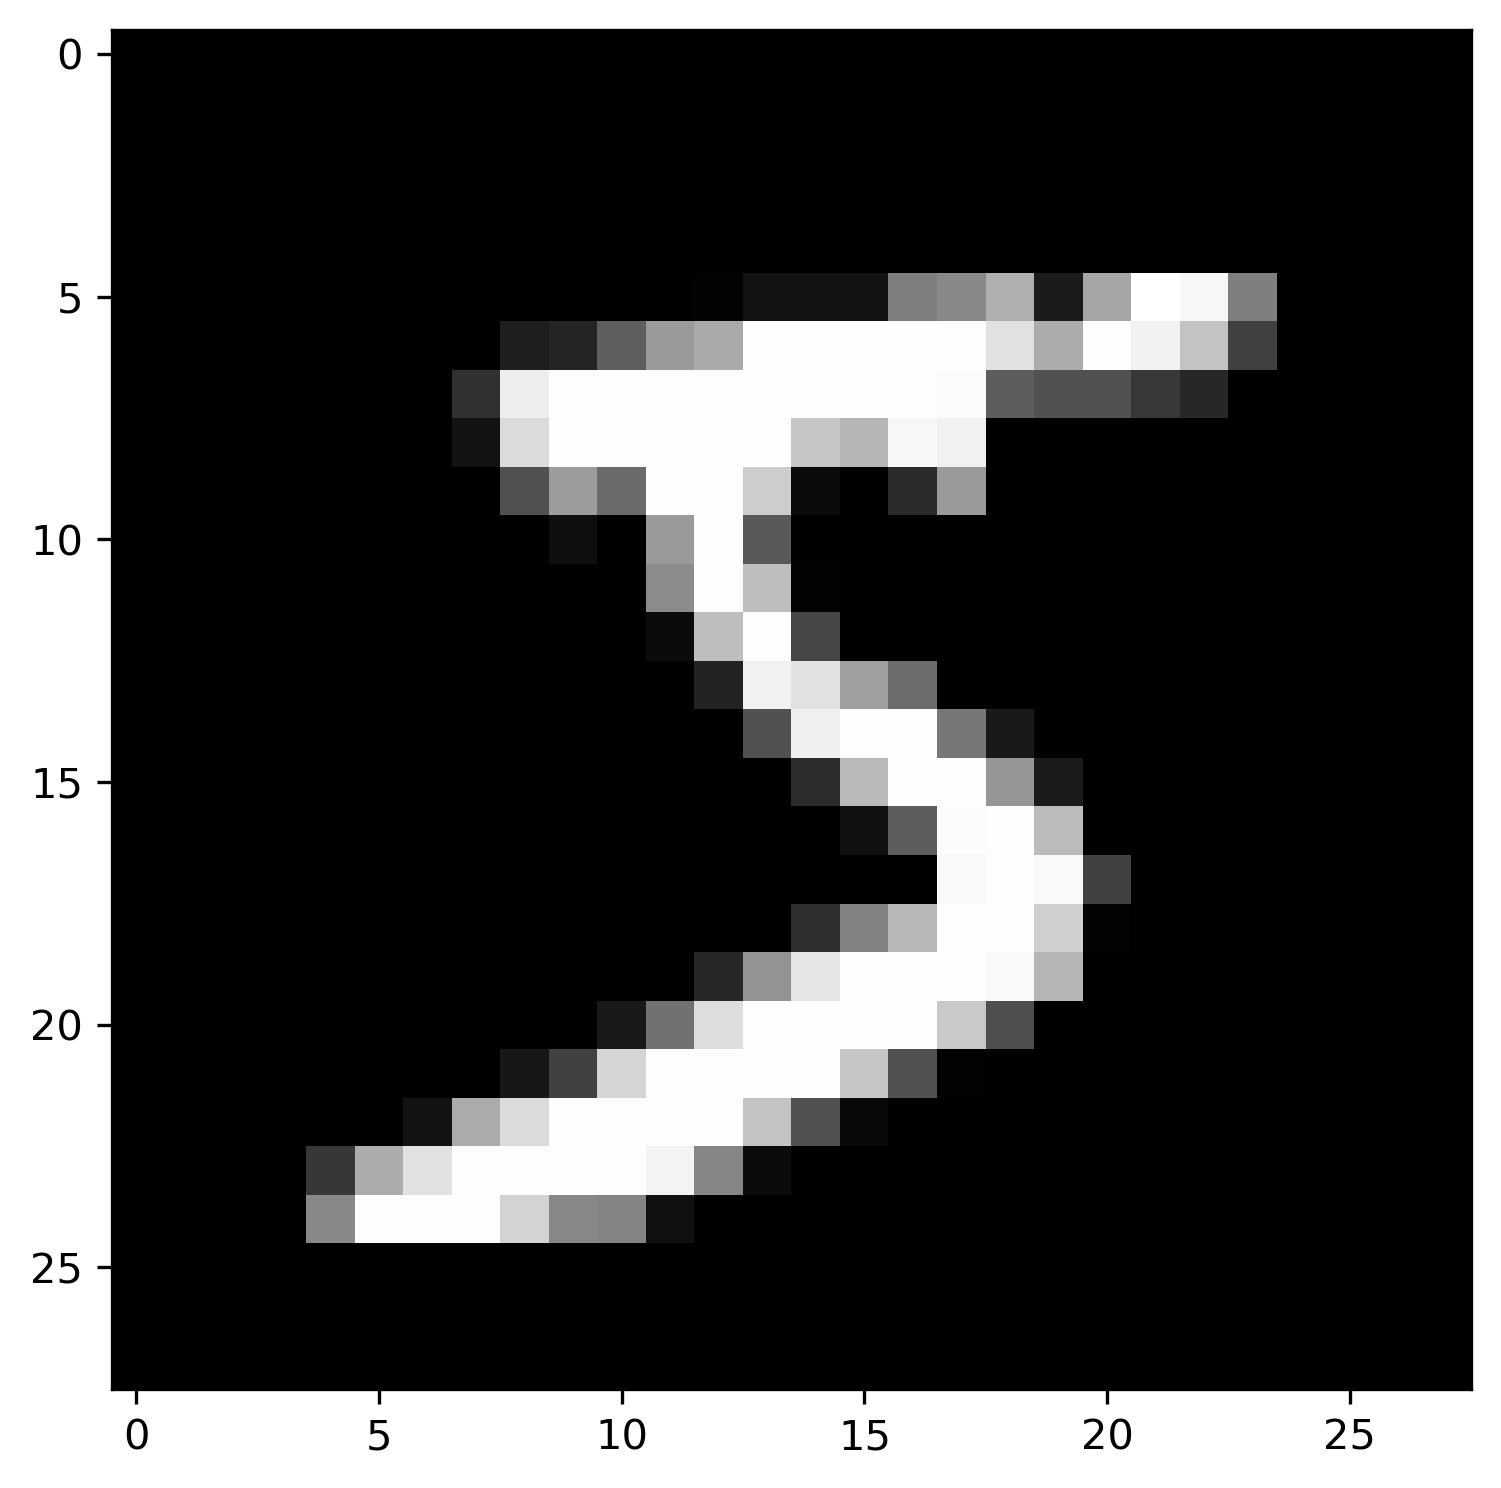

In [11]:
# Change color mapping from viridis to gray to see our grayscale image
plt.imshow(single_image, cmap="gray");

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
# To make sure the network understands these as nominal we need to encode

from tensorflow.keras.utils import to_categorical

In [14]:
y_train.shape

(60000,)

In [15]:
y_example = to_categorical(y_train)

In [16]:
# 10 columns (1 for each nominal value)
y_example.shape

(60000, 10)

In [17]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [20]:
y_cat_train = to_categorical(y_train, num_classes=10)

In [21]:
single_image.max()

255

In [22]:
single_image.min()

0

In [24]:
# Rescale the values to avoid gradient problems (0-1)

X_train = X_train/255
X_test = X_test/255

In [25]:
scaled_image = X_train[0]

In [26]:
scaled_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

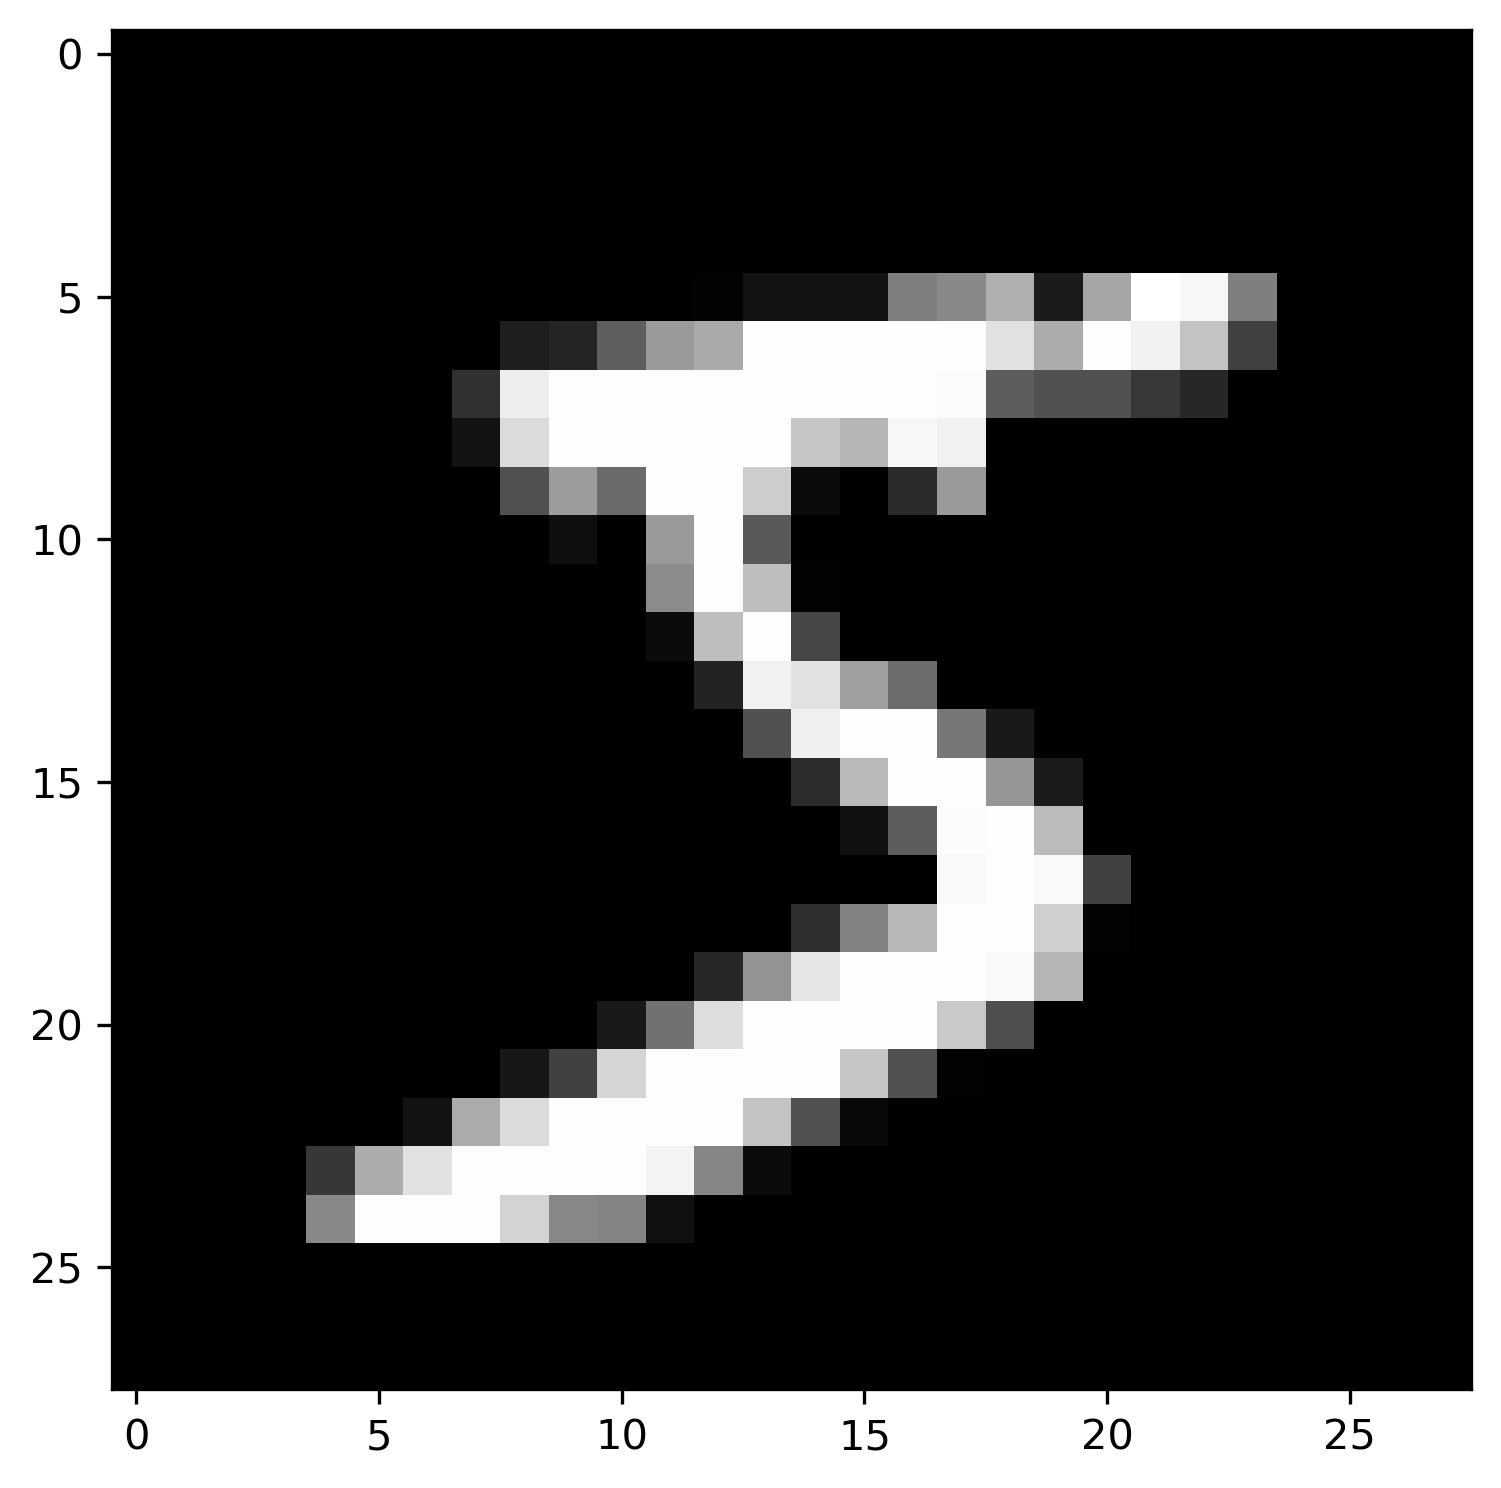

In [28]:
plt.imshow(scaled_image, cmap="gray");

In [29]:
X_train.shape

(60000, 28, 28)

In [31]:
# Reshape to let the network know we only have 1 color channel
# batch_size, width, height, color_channels

X_train = X_train.reshape(60000, 28, 28, 1)

In [32]:
X_test.shape

(10000, 28, 28)

In [33]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [34]:
from tensorflow.keras.models import Sequential

In [35]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [37]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), 
                 strides=(1,1), padding="valid", # default values
                input_shape=(28,28,1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten()) # Should always be present

model.add(Dense(128, activation="relu"))

# Output layer
model.add(Dense(10, activation="softmax")) # softmax -> multiclass

model.compile(loss="categorical_crossentropy",
             optimizer="adam", metrics=["accuracy"]) # keras.io/metrics

Determined by the data : 
* input_shape
* Flatten()
* Output layer

To experiment:
* filters
* kernel_size
* activation function
* Dense layers

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

In [39]:
# As we added accuracy we could monitor acc
early_stop = EarlyStopping(monitor="val_loss", patience=1)

In [40]:
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, 
                                                            y_cat_test),
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 273us/sample - loss: 0.1350 - accuracy: 0.9598 - val_loss: 0.0596 - val_accuracy: 0.9800
Epoch 2/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0479 - accuracy: 0.9851 - val_loss: 0.0524 - val_accuracy: 0.9822
Epoch 3/10
60000/60000 [==============================] - 16s 271us/sample - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.0381 - val_accuracy: 0.9869
Epoch 4/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0425 - val_accuracy: 0.9875


In [41]:
metrics = pd.DataFrame(model.history.history)

In [42]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.135022,0.959817,0.059566,0.9800
1,0.047921,0.985100,0.052352,0.9822
2,0.030047,0.990683,0.038131,0.9869
3,0.020579,0.993400,0.042525,0.9875


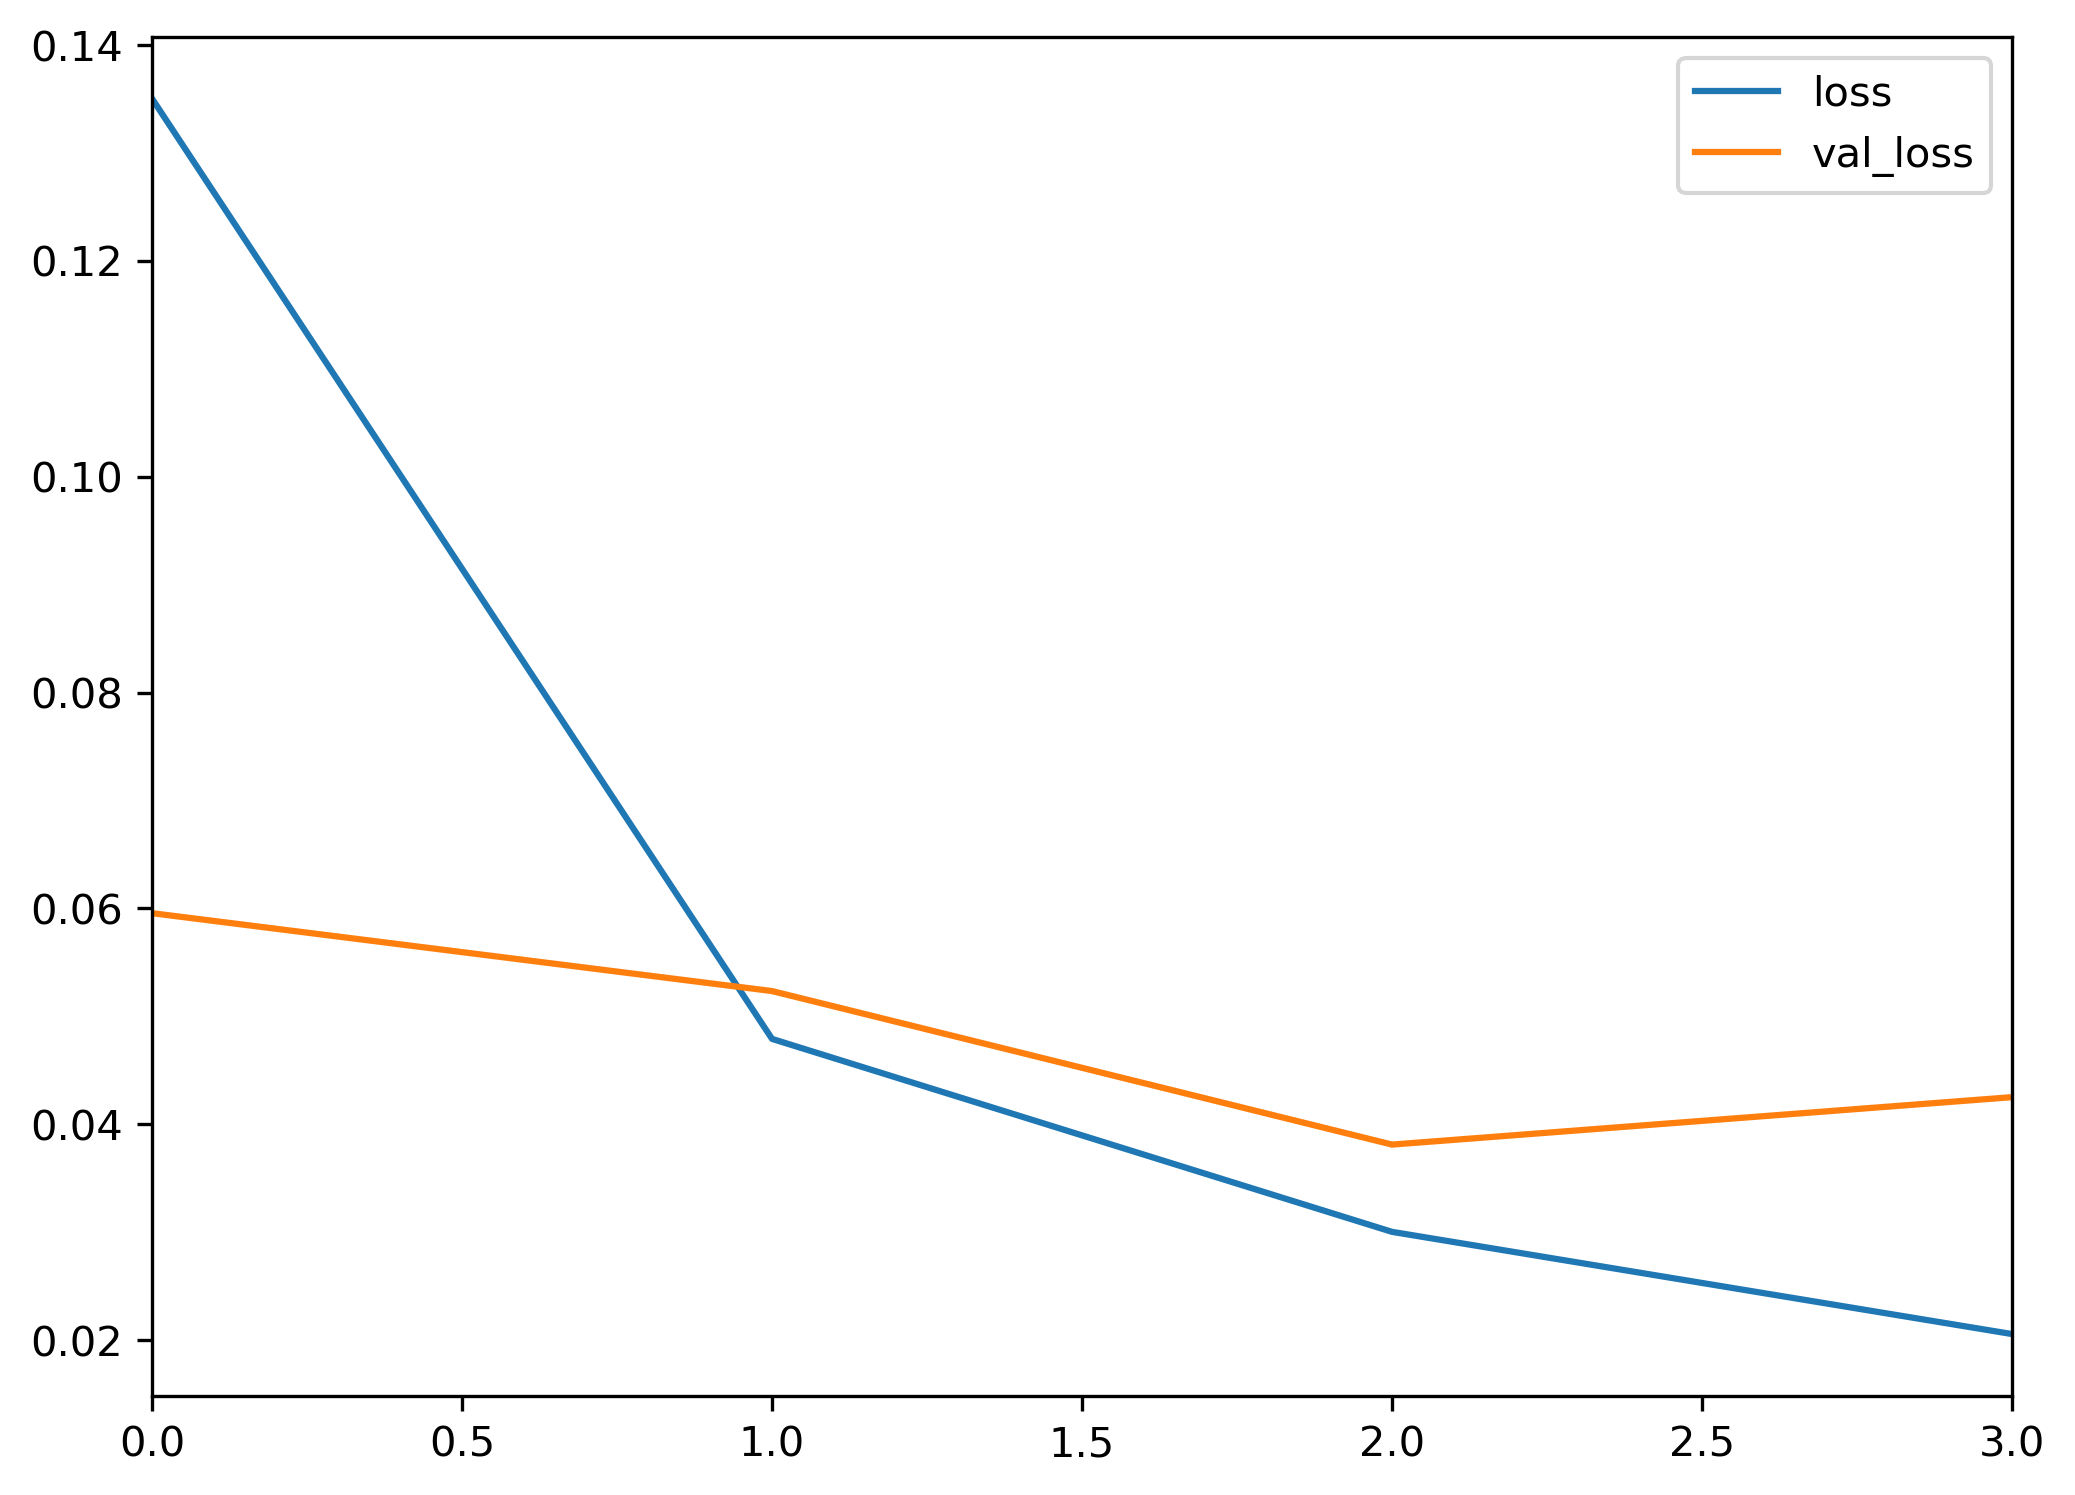

In [45]:
metrics[["loss", "val_loss"]].plot();

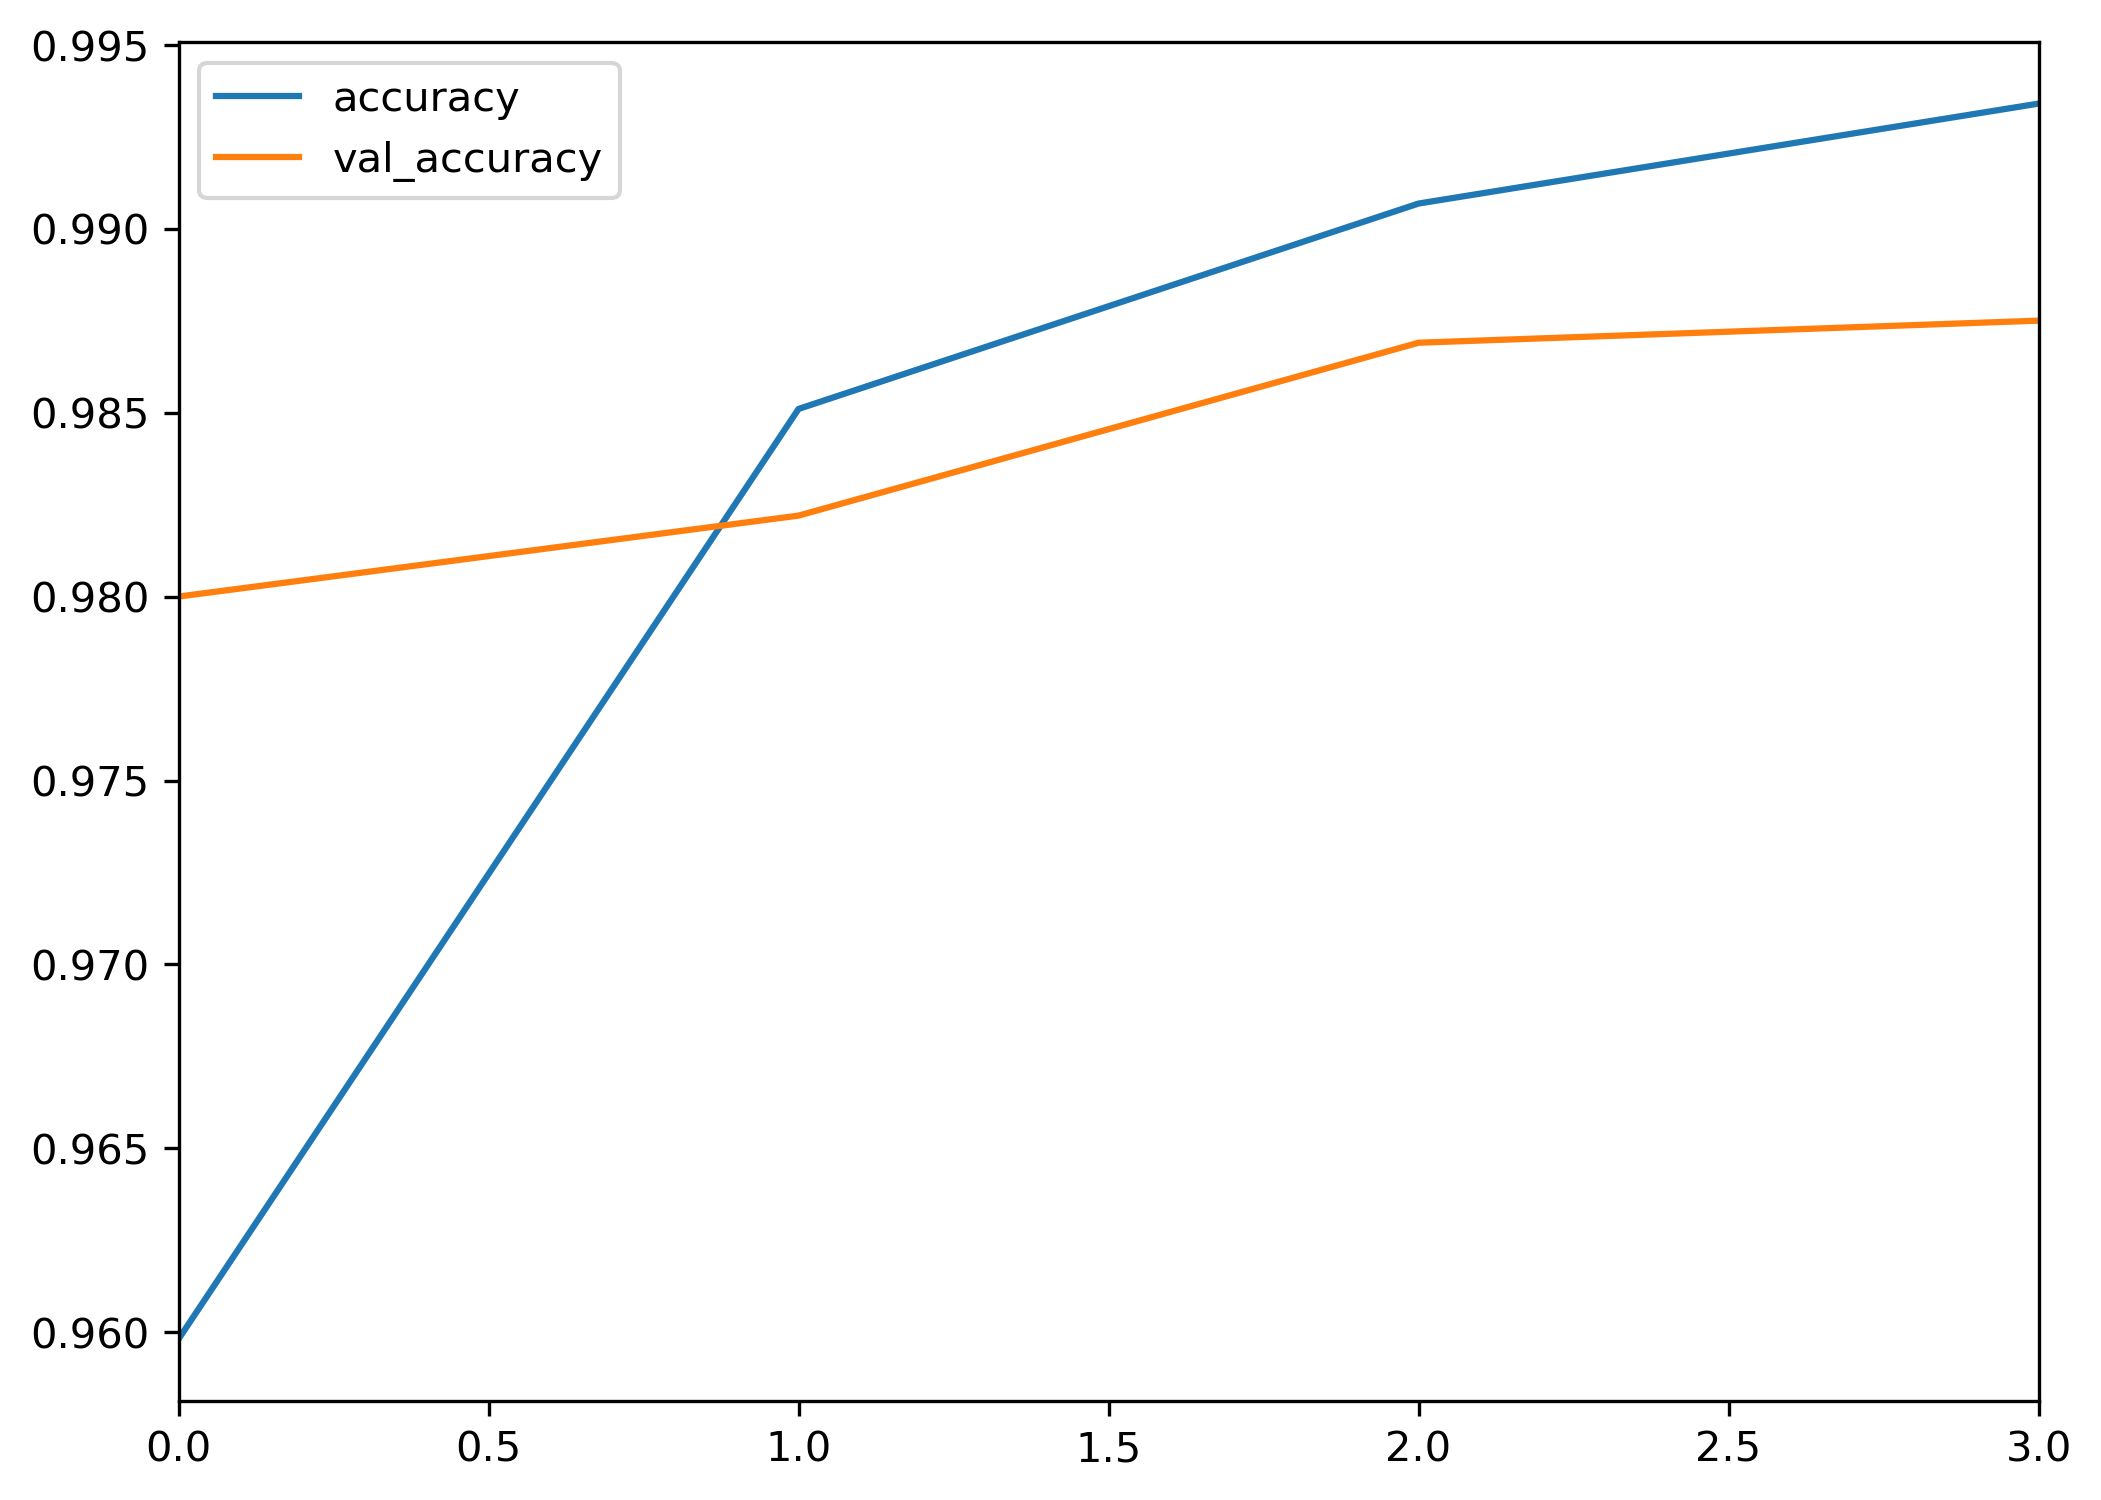

In [46]:
metrics[["accuracy", "val_accuracy"]].plot();

In [48]:
model.metrics_names

['loss', 'accuracy']

In [50]:
model.evaluate(X_test, y_cat_test, verbose=0)

[0.042524696732516166, 0.9875]

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
predictions = model.predict_classes(X_test)

In [53]:
y_cat_test.shape

(10000, 10)

In [54]:
y_test.shape

(10000,)

In [55]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.97      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [57]:
confusion_matrix(y_test, predictions)

array([[ 973,    0,    0,    1,    0,    2,    3,    0,    1,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    7, 1014,    1,    1,    0,    4,    4,    0,    0],
       [   0,    0,    0, 1006,    0,    3,    0,    1,    0,    0],
       [   0,    0,    0,    0,  974,    0,    3,    0,    0,    5],
       [   0,    0,    0,    8,    0,  881,    3,    0,    0,    0],
       [   3,    3,    0,    0,    1,    1,  950,    0,    0,    0],
       [   1,    2,    5,    2,    0,    1,    0, 1017,    0,    0],
       [   5,    2,    2,    3,    0,    3,    3,    5,  948,    3],
       [   2,    2,    0,    4,    9,    4,    0,    9,    1,  978]],
      dtype=int64)

In [62]:
# Predict a new image

my_number = X_test[0]

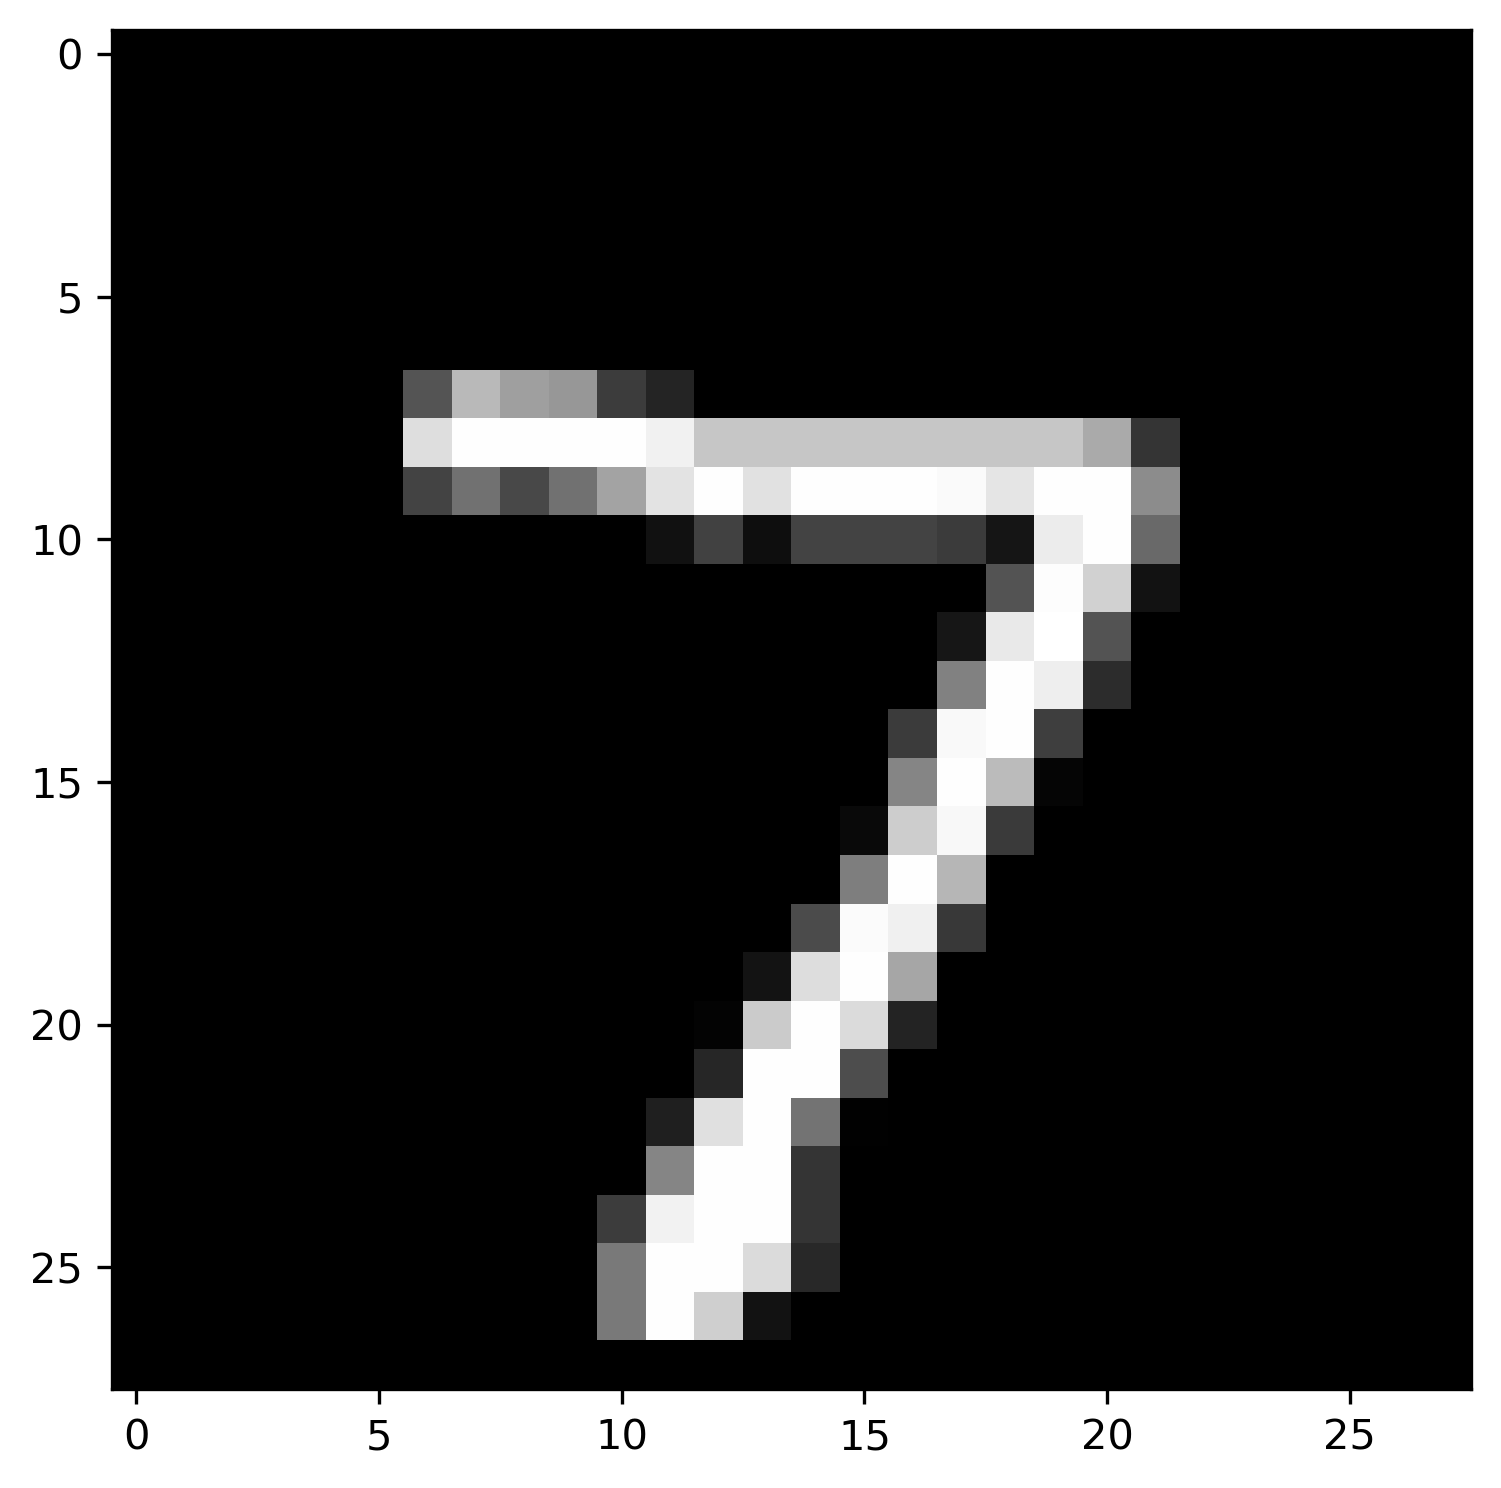

In [65]:
plt.imshow(my_number.reshape(28,28), cmap="gray");

In [66]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)